### 1. 문제정의(목표설정)
- 버섯의 특성들을 활용하여 독/식용으로 분류해보기!
- 결정트리 모델을 시각화 해보기!
- 특성 선택(Feature Selection)도 해보자!

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 학습, 평가 데이터를 자동으로 분리해주는 명령(랜덤으로 샘플링)
from sklearn.model_selection import train_test_split
# 결정 트리 모델 임포트
from sklearn.tree import DecisionTreeClassifier

### 2. 데이터 수집
- csv 파일 로드

In [84]:
# 1. 데이터 로드(index는 설정하지 않아도 됨)
# 2. 전체 컬럼의 행, 열의 숫자를 파악해보기
# 3. 결측치가 있는지 확인해보기

In [85]:
data = pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [86]:
data.shape

(8124, 23)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [88]:
data.describe()

# 문자형 데이터는 수치형 데이터와 다른 통게치가 나옴
# top : 해당 컬럼에서  가장 많은 수를 차지하는 데이터의 유니크값
# freq :  top의 빈도수(데이터의 개수)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 3. 데이터 전처리
- 학습용 데이터라서 전처리는 필요 없음

### 4. 탐색적 데이터 분석

In [89]:
# matplotlib과 같이 시각화 할 수 있는 라이브러리
# matplotlib에 비해 좀 더 깔끔한 느낌
# pandas와의 호환성도 좋음
import seaborn as sns

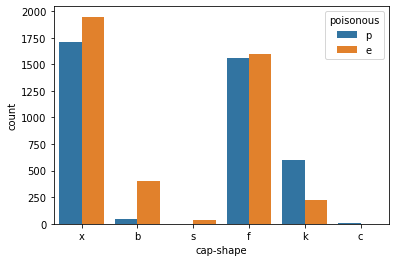

In [90]:
# y축에 데이터의 개수를 카운트 해서 표시해주는 차트
sns.countplot(data=data,
              x='cap-shape',
              # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
              # unique 값에 대한 각각의 bar차트가 표시되고, 범례도 표시됨
              hue='poisonous'
             );

# p가 독성 e가 식용 버섯

In [91]:
# x축에 cap_surface 컬럼을 넣어서 위와 동일하게 그래프를 출력해보세요~!

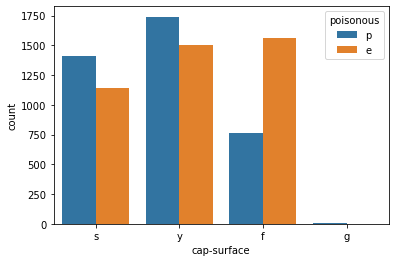

In [92]:
# y축에 데이터의 개수를 카운트 해서 표시해주는 차트
sns.countplot(data=data,
              x='cap-surface',
              # hue : 해당 컬럼의 unique 값들이 들어가서 출력됨
              # unique 값에 대한 각각의 bar차트가 표시되고, 범례도 표시됨
              hue='poisonous'
             );


### 5. 모델링
- 문제(X),정답(y)으로 분리

In [93]:
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [94]:
# 정답은 poisonous 컬럼, 문제는 poisonous를 제외한 모든 컬럼으로 설정해주세요~!
X=data.loc[:, 'cap-shape':]
y=data.loc[:, 'poisonous']    #[행의 범위,열의 범위]

In [95]:
X.shape, y.shape

((8124, 22), (8124,))

In [96]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

#### 레이블 인코딩
- 각각의 유니크값에 대해 0에서 부터 순서대로 번호를 매겨서 인코딩 해주는 방식
- 숫자의 크고 작음에 대한 특성이 작용함
- 회귀와 같이 연속된 숫자를 다루는 알고리즘에서는 1,2,3~ 커지는 숫자가 숫자에 따
른 순서나, 중요도로 인식될 가능성이 있어서 일반적으로 잘 사용하지 않음

In [97]:
# cap-shape 컬럼의 유니크 값 확인
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [98]:
# cap-shape 컬럼의 유니크 값과 개수 확인
X['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [99]:
# 레이블 인코딩이 진행되기 전
X['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [100]:
# 레이블 인코딩 진행 후
X['cap-shape'].map({'x':0, 'f':1, 'k':2, 'b':3, 's':4, 'c':5})

0       0
1       0
2       3
3       0
4       0
       ..
8119    2
8120    0
8121    1
8122    2
8123    0
Name: cap-shape, Length: 8124, dtype: int64

#### 원 핫 인코딩
- 모든 데이터를 0과 1로 변환
- 컴퓨터는 2진법으로 모든 데이터를 처리 하기 때문에 수치에 대한 변화가 적용되는 레이블 인코딩 방식보다는 기계 입장에서 더욱 직관적인 원핫인코딩을 주로 사용

In [101]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [102]:
# 'x', 'b', 's', 'f', 'k', 'c'

In [103]:
# 문제(X)를 원핫인코딩 시켜보자!
X_One_hot = pd.get_dummies(X)
X_One_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


- 정답의 경우 기계가 학습 후 비교만 하는 프로세스이기 때문에 굳이 인코딩을 해줄 필요가 없음
- 실제 정답과 예측한 값이 맞는지 틀린지 확인만 하기 때문에!

- 학습, 평가 데이터로 분리

In [104]:
# 학습, 평가 데이터를 자동으로 분리해주는 명령(랜덤으로 샘플링)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_One_hot,y,
                                                    test_size=0.3,
                                                    random_state=10
                                                   )

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


- 결정트리 모델을 불러와서 학습시키고 예측해서 정확도를 확인해보자!

In [106]:
# 모델 로드
tree_model = DecisionTreeClassifier()
# 트리 모델은 하이퍼파라미터를 조정해주지 않으면 완전히 분류될때까지 계속해서 분기를 시켜나감

# 모델 학습
tree_model.fit(X_train,y_train)

# 모델 정확도 확인(train)
tree_model.score(X_train,y_train)

1.0

In [107]:
# 모델 정확도 확인(test)
tree_model.score(X_train,y_train)

1.0

### 트리 모델 내부 시각화하기
- 외부 라이브러리인 graphviz를 설치(트리 모델의 내부를 시각화하기 위한 라이브러리)

In [108]:
!pip install graphviz

In [109]:
from sklearn.tree import export_graphviz

In [111]:
# dot파일 : 그래프를 불러오기 위한 텍스트 형식의 파일
# out_file : 파일명 및 저장 경로 설정
export_graphviz(tree_model,out_file='data/tree.dot',
                # 클래스(=label) 이름 설정
                class_names=['독','식용'],
                # 원핫인코딩된 데이터프레임의 컬럼명들을 가져와서 특성 이름으로 넣어줌
                feature_names=X_One_hot.columns,
                # 지니불순도 출력(False는 미출력)
                impurity=True,
                # 각 노드들의 클래스가 구분되도록 색을 칠해주는 명령
                filled=True
               )

In [118]:
#import os
#os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

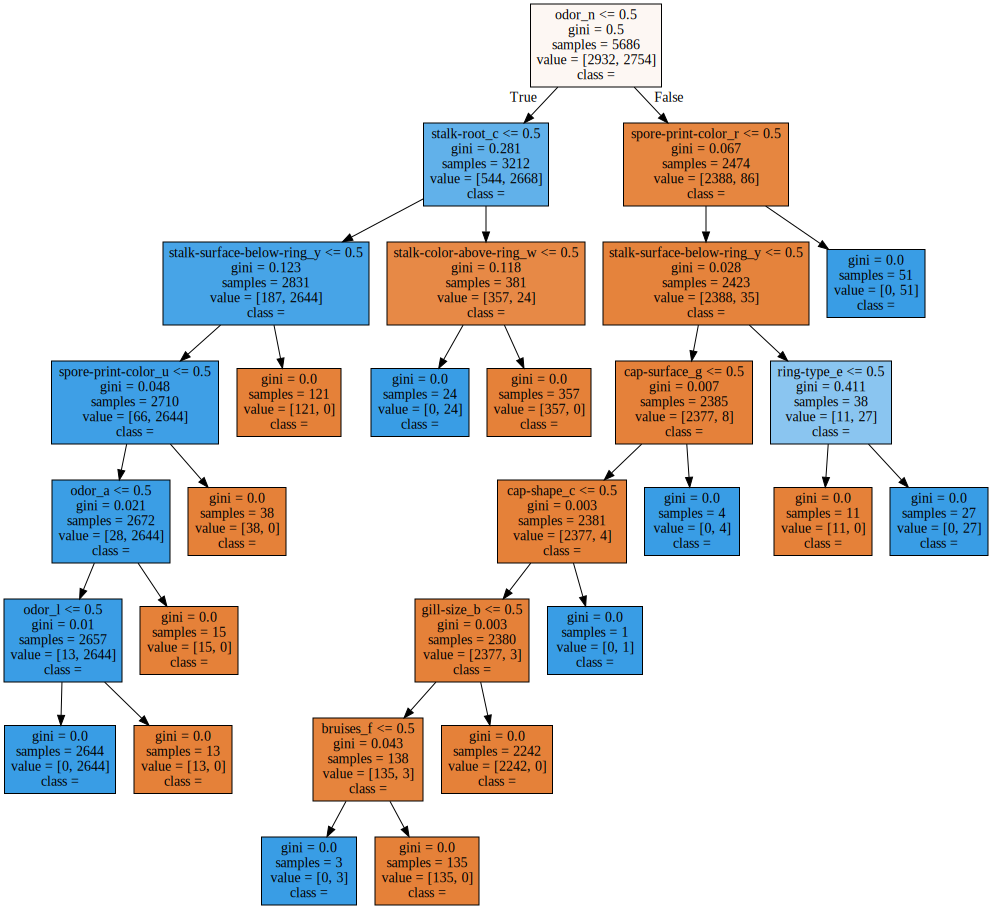

In [119]:
# dot 파일을 불러와서 실제로 그래프로 표현해보자!
import graphviz

# tree.dot 파일을 불러오면서 UTF8(국제표준규격)로 변환을 시켜주고 이를 f라고 지칭한다.
with open('data/tree.dot', encoding='UTF8') as f:
    dot_graph = f.read() 

display(graphviz.Source(dot_graph))

# <= 0.5 : 원핫인코딩 후 0또는 1을 구분하는 조건
# gini : 지니불순도 값
# samples : 데이터의 개수
# value : 클래스별 개수['독'의 개수,'식용'의 개수]
# class : 예측한 정답값(=label)

### 하이퍼파라미터 조정

In [140]:
tree_model2 = DecisionTreeClassifier(max_depth=1,
                                     max_leaf_nodes=7,
                                     min_samples_leaf=50
                                    )
tree_model2.fit(X_train,y_train)

tree_model2.score(X_train,y_train)

0.8892015476609215

In [141]:
tree_model2.score(X_test, y_test)

0.8810500410172273

In [142]:
export_graphviz(tree_model2,out_file='data/tree2.dot',
                class_names=['독','식용'],
                feature_names=X_One_hot.columns,
                impurity=True,
                filled=True
               )

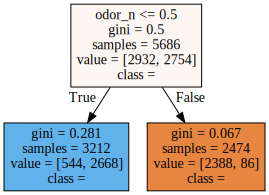

In [143]:
with open('data/tree2.dot', encoding='UTF8') as f:
    dot_graph2 = f.read()

display(graphviz.Source(dot_graph2))

In [150]:
train_list = []
test_list = []

for k in range(1,11,1) :
    # 모델 생성 및 하이퍼파라미터에 변수 넣기
    tree_model2 = DecisionTreeClassifier(max_depth=k)
    # 모델 학습
    tree_model2.fit(X_train,y_train)
    
    # 학습데이터의 정확도 확인
    train_score = tree_model2.score(X_train,y_train)
    train_list.append(train_score)
    
    # 평가데이터의 정확도 확인
    test_score = tree_model2.score(X_test,y_test)
    test_list.append(test_score)

<function matplotlib.pyplot.show(close=None, block=None)>

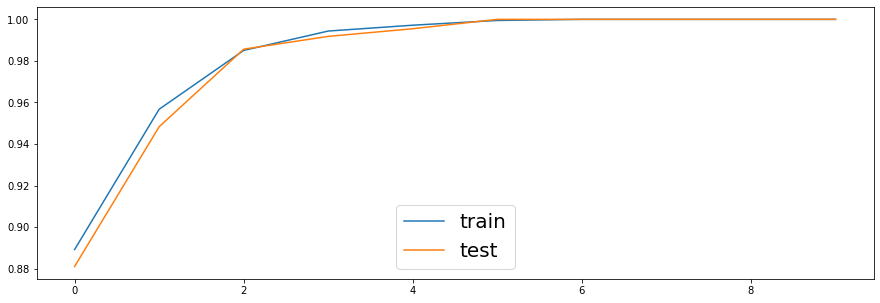

In [151]:
plt.figure(figsize=(15,5))

plt.plot(train_list, label='train')
plt.plot(test_list, label='test')

plt.legend(prop={'size':20}, loc='lower center')
plt.show

### 특성선택(feature selection)
- 지도학습 모델에서는 데이터의 각 특성들의 중요도를 출력할 수 있음(정답에 얼만큼 영향을 미치는 특성인가)
   -( 각 특성들은 0~1사이의 중요도값을 가짐, 모든 특성들의 중요도의 합은 1이 됨)
- 0 이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 도움이 되지 않는 특성
- 1 이 나오는 컬럼은 정답을 정확하게 예측해 내는 컬럼(1인 특성이 있으면 모델이 정답을 예측하는데 있어서 다른 특성은 아예 필요가 없다는 뜻)

In [152]:
# 트리 모델의 특성들의 중요도를 출력해보자!
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.02103219e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80252522e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.06659270e-03, 0.00000000e+00, 1.04007607e-02, 0.00000000e+00,
       0.00000000e+00, 9.10945096e-03, 0.00000000e+00, 6.23355113e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.32614456e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.79373456e-01, 0.00000000e+00, 0.00000000e+00,
      

In [153]:
# 특성 개수
len(fi)

117

In [156]:
# 특성들의 컬럼명과 순서
X_One_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [158]:
# 특성중요도를 데이터프레임으로 만들어보자!
fi_df = pd.DataFrame(fi, index=X_One_hot.columns, columns=['특성중요도'])
fi_df

,특성중요도
cap-shape_b,0.000000
cap-shape_c,0.000702
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [159]:
# 내림차순 정렬
fi_df.sort_values(by='특성중요도', ascending=False, inplace=True)
fi_df

,특성중요도
odor_n,0.623355
stalk-root_c,0.179373
stalk-surface-below-ring_y,0.090811
spore-print-color_r,0.034164
spore-print-color_u,0.025833
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


### tree 모델 내부 시각화 표를 보면 가장 중요도가 높은 odor_n 컬럼을 가장 먼저 고려해 분류한 것을 볼 수 있음
### 중요도가 가장 높은 컬럼(정답을 분류해내는데 가장 중요한)을 먼저 고려해야 가장 효율적으로 분류 할 수 있음
### 현재 mushroom 데이터는 odor_n 컬럼이 60% 이상의 중요도를 혼자 차지하고 있기 때문에 모델이 학습하는데 용이하여 100%의 정확도를 쉽게 얻어 낼 수 있음